In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pathlib
from plot_style import *

USE_MARKERS = False

%ls experiments/topo_comparison/

2024-03-25 06:07:40/


In [2]:
l = list(pathlib.Path("./experiments/topo_comparison/").iterdir())
l = sorted(l)
recent_dir = l[-1]
recent_dir

PosixPath('experiments/topo_comparison/2024-03-25 06:07:40')

In [3]:
with open(recent_dir / "config.json", "r") as f:
    config = json.load(f)
config

{'num_global_rounds': 2,
 'num_worker_nodes': 1000,
 'max_workers': 10,
 'participation': 0.01,
 'alpha': 0.001}

In [4]:
df = pd.concat([pd.read_feather(f) for f in recent_dir.glob("*.feather")])
df["aggr_shape"] = df.aggr_shape.astype(str)
df.head()

,train/acc,train/loss,train/epoch,train/batch_idx,train/time,node/idx,node/kind,parent/idx,parent/kind,round,test/acc,test/loss,train/rel_time,aggr_shape
0,0.000000,2.343616,0,0,2024-03-25 06:09:57.017667,750,worker,1003,aggregator,0,0.0767,2.30748,3.905156,[6]
1,0.111111,2.294372,1,0,2024-03-25 06:09:57.021182,750,worker,1003,aggregator,0,0.0767,2.30748,3.908671,[6]
2,0.333333,2.248620,2,0,2024-03-25 06:09:57.025966,750,worker,1003,aggregator,0,0.0767,2.30748,3.913455,[6]
3,0.333333,2.205087,3,0,2024-03-25 06:09:57.032253,750,worker,1003,aggregator,0,0.0767,2.30748,3.919742,[6]
4,0.555556,2.162183,4,0,2024-03-25 06:09:57.038961,750,worker,1003,aggregator,0,0.0767,2.30748,3.926450,[6]


In [5]:
# sns.relplot(
#     df,
#     kind="line",
#     col="aggr_shape",
#     col_wrap=5,
#     x="round",
#     y="train/loss",
#     errorbar=None
# )
# plt.show()

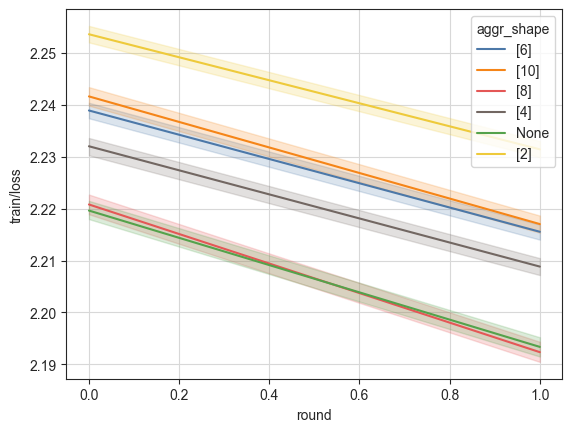

In [8]:
sns.lineplot(df, x="round", y="train/loss", hue="aggr_shape")
plt.show()